# Generate radar data

In this notebook, we generate a synthetic dataset for the problem of identifying the sea clutter in Weather Radar data in [Radar_robust_regression.ipynb](Radar_robust_regression.ipynb).
The synthetic dataset is a reproduction of fig A.1b in (Trombe 2014).

![Reflection signal from the Weather Radar in Trombe 2014](Trombe2014_data.png)


Reference: P.-J. Trombe *et al.*, “Weather radars – the new eyes for offshore wind farms?,” *Wind Energy*, 2014.



In [1]:
import numpy as np
from scipy.interpolate import interp1d

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

Manually created turning points for a spline interpolation

In [3]:
pts = [
    (0, 270),
    (1, 310),
    (2, 270),
    (4, 100),
    (15, -50),
    (30, 0),
    (34, 50),
    (36, -20),
    (37, -20),
    (38, 15),
    (40, -20),
    (47, -20),
    (48, 10),
    (51, -20),
    (55, -20),
    (56, 20),
    (57, 18),
    (58, 10),
    (60, -20)
]
xi, yi = np.array(pts).T

Spline interpolation

In [4]:
x = np.linspace(0, xi.max(), 300)
y2 = interp1d(xi, yi, 'quadratic')(x)

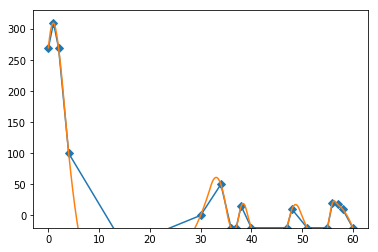

In [5]:
plt.plot(xi, yi, 'D-')
plt.plot(x, y2, '-')

plt.ylim(ymin=-20);

Saturation of the data close to zero

In [6]:
def sat(x):
    scale = x.max()/10
    xs = x/scale
    xs = np.log(np.sqrt(1+np.exp(2*xs)))
    xs *= scale
    return xs

In [7]:
sat(np.array([-1., 0, 1, 10])).round(2)

array([ 0.06,  0.35,  1.06, 10.  ])

In [8]:
y2s = sat(y2)

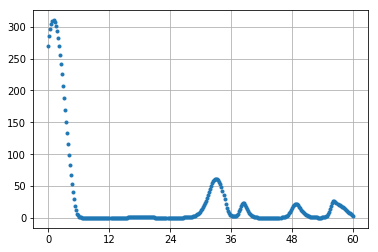

In [9]:
plt.plot(x, y2s, '.')
plt.grid()
plt.xticks(np.arange(6)*12);

How many points close to zero: 70%

In [10]:
(y2<1).mean()

0.7033333333333334

Addition of a linear trend

$$ y(x) = 60 + \frac{2}{6}x$$

In [30]:
trend = 60+x*2/6
y2s_trend = y2s + trend

Nice plot, for the presentation

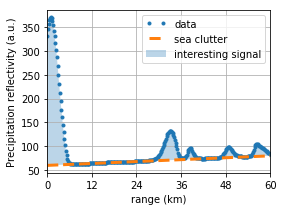

In [29]:
plt.figure(figsize=(4,3))
plt.plot(x, y2s_trend, '.', label='data')
plt.plot(x, trend, '--', lw=3, label='sea clutter')
plt.fill_between(x, y2s_trend, trend, alpha=0.3, label='interesting signal')
plt.grid()
plt.legend(numpoints=2)
plt.xticks(np.arange(6)*12)
plt.xlim(0, 60)

plt.xlabel('range (km)')
plt.ylabel('Precipitation reflectivity (a.u.)')
plt.savefig('radar_data.png', dpi=200, bbox_inches='tight')

save results in a CSV file

In [14]:
data = np.vstack((x,y2s_trend)).T
data.shape

(300, 2)

In [15]:
np.savetxt('radar_data.csv', data, delimiter=',')